<a href="https://colab.research.google.com/github/GoroCollins/machine-learning/blob/main/Week2_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [3]:
# Save the input and target variables
data = diabetes_data.data
target = diabetes_data.target

In [4]:
# Normalise the target data (this will make clearer training curves)
target = target/255.0


In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2)

In [6]:
x_train.shape[1]

10

#### Train a feedforward neural network model

In [7]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])


In [8]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 75,585
Trainable params: 75,585
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [10]:
# Train the model, with some of the data reserved for validation
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=2)


Epoch 1/20
9/9 - 1s - loss: 0.3664 - mae: 0.5144 - val_loss: 0.1180 - val_mae: 0.2587 - 903ms/epoch - 100ms/step
Epoch 2/20
9/9 - 0s - loss: 0.1167 - mae: 0.2782 - val_loss: 0.1291 - val_mae: 0.3146 - 73ms/epoch - 8ms/step
Epoch 3/20
9/9 - 0s - loss: 0.0832 - mae: 0.2447 - val_loss: 0.0500 - val_mae: 0.1837 - 55ms/epoch - 6ms/step
Epoch 4/20
9/9 - 0s - loss: 0.0619 - mae: 0.2066 - val_loss: 0.0469 - val_mae: 0.1787 - 61ms/epoch - 7ms/step
Epoch 5/20
9/9 - 0s - loss: 0.0498 - mae: 0.1871 - val_loss: 0.0519 - val_mae: 0.1925 - 68ms/epoch - 8ms/step
Epoch 6/20
9/9 - 0s - loss: 0.0472 - mae: 0.1800 - val_loss: 0.0464 - val_mae: 0.1758 - 55ms/epoch - 6ms/step
Epoch 7/20
9/9 - 0s - loss: 0.0453 - mae: 0.1730 - val_loss: 0.0474 - val_mae: 0.1773 - 54ms/epoch - 6ms/step
Epoch 8/20
9/9 - 0s - loss: 0.0435 - mae: 0.1696 - val_loss: 0.0476 - val_mae: 0.1762 - 70ms/epoch - 8ms/step
Epoch 9/20
9/9 - 0s - loss: 0.0432 - mae: 0.1694 - val_loss: 0.0487 - val_mae: 0.1783 - 70ms/epoch - 8ms/step
Epoch 1

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)


3/3 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.1663


#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

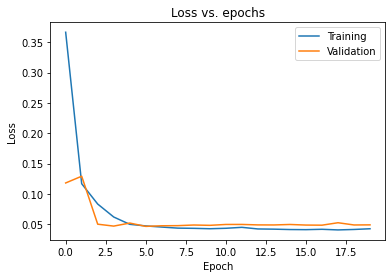

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [14]:
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import regularizers

In [15]:
def get_regularised_model(wd, rate):
    model = tf.keras.Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu", input_shape=(x_train.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model1 = get_regularised_model(.001, .3)


In [17]:
# Compile the model
model1.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [18]:
# Train the model, with some of the data reserved for validation
history = model1.fit(x_train, y_train, epochs=25, validation_split=.2, verbose=2)


Epoch 1/25
9/9 - 1s - loss: 1.0048 - mae: 0.5185 - val_loss: 0.6943 - val_mae: 0.2377 - 1s/epoch - 166ms/step
Epoch 2/25
9/9 - 0s - loss: 0.7045 - mae: 0.3051 - val_loss: 0.5943 - val_mae: 0.2060 - 77ms/epoch - 9ms/step
Epoch 3/25
9/9 - 0s - loss: 0.6013 - mae: 0.2476 - val_loss: 0.5371 - val_mae: 0.1840 - 77ms/epoch - 9ms/step
Epoch 4/25
9/9 - 0s - loss: 0.5431 - mae: 0.2318 - val_loss: 0.4844 - val_mae: 0.1895 - 77ms/epoch - 9ms/step
Epoch 5/25
9/9 - 0s - loss: 0.4852 - mae: 0.2141 - val_loss: 0.4377 - val_mae: 0.1748 - 57ms/epoch - 6ms/step
Epoch 6/25
9/9 - 0s - loss: 0.4404 - mae: 0.2081 - val_loss: 0.3977 - val_mae: 0.1736 - 55ms/epoch - 6ms/step
Epoch 7/25
9/9 - 0s - loss: 0.3994 - mae: 0.2029 - val_loss: 0.3633 - val_mae: 0.1737 - 60ms/epoch - 7ms/step
Epoch 8/25
9/9 - 0s - loss: 0.3704 - mae: 0.2027 - val_loss: 0.3329 - val_mae: 0.1738 - 57ms/epoch - 6ms/step
Epoch 9/25
9/9 - 0s - loss: 0.3349 - mae: 0.1982 - val_loss: 0.3061 - val_mae: 0.1752 - 58ms/epoch - 6ms/step
Epoch 10/2

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test)


3/3 [==============================] - 0s 5ms/step - loss: 0.1263 - mae: 0.1674


#### Plot the learning curves

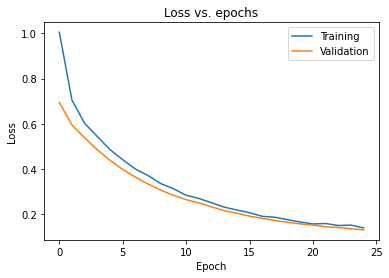

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [35]:
# Write a custom callback
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, epoch, logs):
    print(f'Now training epoch: {epoch}')


In [ ]:
# Re-build the model



In [ ]:
# Compile the model



#### Train the model with the callback

In [36]:
# Train the model, with some of the data reserved for validation
history = model1.fit(x_train, y_train, epochs=20, verbose=False, callbacks=[mycallback()], validation_split=.2)


Now training epoch: 0
Now training epoch: 1
Now training epoch: 2
Now training epoch: 3
Now training epoch: 4
Now training epoch: 5
Now training epoch: 6
Now training epoch: 7
Now training epoch: 8
Now training epoch: 9
Now training epoch: 10
Now training epoch: 11
Now training epoch: 12
Now training epoch: 13
Now training epoch: 14
Now training epoch: 15
Now training epoch: 16
Now training epoch: 17
Now training epoch: 18
Now training epoch: 19


In [ ]:
# Evaluate the model



In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()